# Regression Analysis 

In this linear regression analysis, our dependent variable is the amount of malnourished children( between ages 0 and 5), with a total of 8
independent variables. Each of the independent variables and the dependent variables have been calculated by their population ratio (for example, in the
case of finding the sanitation factor, the number of households without toilets was divided by the total number of households in that sub district/
taluka)

Requirements:

-Python 3.6 

-Python packages:

    - pandas
    - numpy
    - statsmodels
    - sklearn
    - matplotlib
    
This code was run through the Jupyter notebook IDE with Python 3.6.5

###   Regression using all factors

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df= pd.read_csv("C:/Users/Vinayak/Documents/CSTEP/Pentaho Datasets/Combined data.csv")
X =df[['Illiteracy Factor'  ,'Rural Factor'  ,'Water Quality Factor',
       'Not Working Factor','Sanitation Factor'
       ,'Water Location Factor','Women Illiteracy Factor',
       'Women Workforce Factor']]
y = df['Total UW 0-5 years']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)


from sklearn import linear_model
from sklearn.model_selection import train_test_split
regr= linear_model.LinearRegression()

regr.fit(x_train,y_train)
print('\n')

from sklearn.metrics import mean_squared_error
from math import sqrt

print('Root mean squared error: ',sqrt(mean_squared_error
                                       (regr.predict(x_test),y_test)))
print('Score of the model is ',regr.score(x_test,y_test))



Root mean squared error:  0.07375016008765832
Score of the model is  0.4888003913043203


From the dataset, we are able to gather 8 factors. To make the model more robust, we can apply several algorithms to remove 
any unimportant independant factors from the linear regression model. Here, we've taken the step wise regression algorithm, 
which compares p-values of factors and adds/drops them based on their values compared to the chosen significance level(0.05)


### Step wise Regression and then generating the regression anaylsis report

In [2]:

df= pd.read_csv("C:/Users/Vinayak/Documents/CSTEP/Pentaho Datasets/Combined data.csv")
X =df[['Illiteracy Factor'  ,'Rural Factor'  ,'Water Quality Factor',
       'Not Working Factor','Sanitation Factor','Water Location Factor'
       ,'Women Illiteracy Factor','Women Workforce Factor']]
y = df['Total UW 0-5 years']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
X=x_train
y=y_train
def stepwise_selection(X, y,initial_list=[], threshold_in=0.01, threshold_out = 0.05,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant
                           (pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.
                      format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.
                      format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)
print('resulting features:')
print(result)

X=X[result]
model1=sm.OLS(y,sm.add_constant(X))
result=model1.fit()
print(result.summary())
from sklearn import linear_model

regr= linear_model.LinearRegression()
regr.fit(X,y)

print('\n')
print("Regression Intercept is ",regr.intercept_)
print("Coefficients are ",regr.coef_)
print('\n')



Add  Water Location Factor          with p-value 5.62152e-14
Add  Sanitation Factor              with p-value 0.00369948
Add  Not Working Factor             with p-value 0.00207395
Add  Women Workforce Factor         with p-value 0.00242309
Drop Water Location Factor          with p-value 0.0909087
resulting features:
['Sanitation Factor', 'Not Working Factor', 'Women Workforce Factor']
                            OLS Regression Results                            
Dep. Variable:     Total UW 0-5 years   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     36.77
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           2.43e-17
Time:                        16:04:19   Log-Likelihood:                 156.25
No. Observations:                 136   AIC:                            -304.5
Df Residuals:                     132   BIC:             

C:\Users\Vinayak\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
C:\Users\Vinayak\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


In [3]:

df= pd.read_csv("C:/Users/Vinayak/Documents/CSTEP/Pentaho Datasets/Combined data.csv")
X =df[['Women Workforce Factor'  ,'Not Working Factor'  ,'Sanitation Factor']]
y = df['Total UW 0-5 years']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

from sklearn import linear_model
from sklearn.model_selection import train_test_split
regr= linear_model.LinearRegression()

regr.fit(x_train,y_train)
print('\n')

from sklearn.metrics import mean_squared_error
from math import sqrt

print('Root mean squared error: ',
      sqrt(mean_squared_error(regr.predict(x_test),y_test)))
print('Score of the model is ',regr.score(x_test,y_test))



Root mean squared error:  0.07258791191170855
Score of the model is  0.5047856908985455


Hence, we were able to reduce the number of independent variables to three factors, Sanitation,Not Working and Women Workforce factor. 


### Using other Machine Learning Models to train and test the data

####  Support Vector Machine

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

df= pd.read_csv("C:/Users/Vinayak/Documents/CSTEP/Pentaho Datasets/Combined data.csv")

df_x =df[['Illiteracy Factor'  ,'Rural Factor','Water Quality Factor',
          'Not Working Factor','Sanitation Factor','Water Location Factor',
          'Women Illiteracy Factor','Women Workforce Factor']]
df_y = df['Total UW 0-5 years']
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)


In [6]:
from sklearn import svm
model = svm.SVR(kernel='rbf')
model.fit(x_train,y_train)
#RBF kernel
print('Coefficients')
print(model.dual_coef_)
print('Support Vectors ')
print(model.support_vectors_)
print('Intercept ')
print(model.intercept_)

Coefficients
[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
  -1.00000000e+00  2.50229974e-01  1.00000000e+00  1.00000000e+00
  -1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00  7.78176464e-04  1.00000000e+00
  -3.17527008e-01  1.00000000e+00 -1.00000000e+00 -1.00000000e+00
   1.00000000e+00 -1.00000000e+00 -1.00000000e+00  1.00000000e+00
  -1.00000000e+00  1.00000000e+00  1.00000000e+00 -6.48881569e-01
   1.00000000e+00  7.15400426e-01 -1.00000000e+00]]
Support Vectors 
[[0.4365 0.9126 0.716  0.5291 0.9033 0.3651 0.5339 0.3994]
 [0.5138 0.9135 0.4715 0.5434 0.9506 0.4488 0.6141 0.3893]
 [0.3731 0.8546 0.6939 0.5619 0.8655 0.3754 0.4576 0.3337]
 [0.4156 0.8461 0.694  0.4997 0.6885 0.1765 0.4859 0.3705]
 [0.4827 0.8771 0.5845 0.5673 0.9328 0.4534 0.5762 0.3387]
 [0.4848 0.9178 0.5709 0.5238 0.9351 0.359  0.5784 0.4082]
 [0.4352 0.8654 0.6895 0.5239 0.8933

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root mean squared error: ',
      sqrt(mean_squared_error(model.predict(x_test),y_test)))
print('Score of the model is ',
      model.score(x_test,y_test))

Root mean squared error:  0.07997852133408363
Score of the model is  0.3988105939342975


####  K-Nearest Neighbors

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
df_x =df[['Illiteracy Factor'  ,'Rural Factor'  ,'Water Quality Factor',
          'Not Working Factor','Sanitation Factor','Water Location Factor',
          'Women Illiteracy Factor','Women Workforce Factor']]
df_y = df['Total UW 0-5 years']
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=4)

In [11]:
neigh.fit(x_train,y_train) 
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Root mean squared error: ',sqrt(mean_squared_error(neigh.predict(x_test),y_test)))
print('Score of the model is ',neigh.score(x_test,y_test))

Root mean squared error:  0.06882901195011745
Score of the model is  0.5547461857991336


####  Neural Networks

In [12]:

from sklearn.model_selection import train_test_split
import numpy as np
df_x =df[['Illiteracy Factor'  ,'Rural Factor'  ,'Water Quality Factor',
          'Not Working Factor','Sanitation Factor','Water Location Factor',
          'Women Illiteracy Factor','Women Workforce Factor']]
df_y = df['Total UW 0-5 years']
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)


In [13]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [22]:

from sklearn.neural_network import MLPRegressor
model=MLPRegressor(hidden_layer_sizes=(150,),max_iter=300)
model.fit(x_train,y_train)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
#Note that different values are obtainted since the MLPRegressor always create a different neural network each time it is called. 
#Hence the highest frequent occuring value should be considered then.
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Root mean squared error: ',sqrt(mean_squared_error(model.predict(x_test),y_test)))
print('Score of the model is ',model.score(x_test,y_test))

Root mean squared error:  0.08547167748445296
Score of the model is  0.31339172509644597


### Results

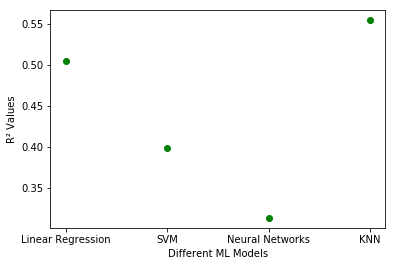

In [3]:
import matplotlib.pyplot as plt
scores = [0.5047856908985455, 0.3988105939342975, 0.31339172509644597,0.5547461857991336]
algos = ['Linear Regression', 'SVM', 'Neural Networks','KNN']
plt.plot(algos, scores, 'go',  )
plt.xlabel("Different ML Models")
plt.ylabel("R² Values")
plt.show()

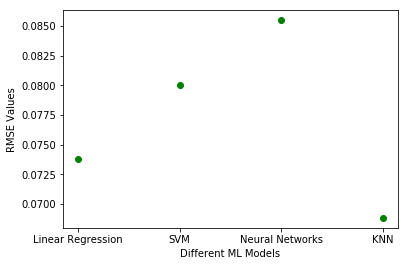

In [2]:
import matplotlib.pyplot as plt
rmse = [0.07375016008765832, 0.07997852133408363, 0.08547167748445296,0.06882901195011745]
algos = ['Linear Regression', 'SVM', 'Neural Networks','KNN']
plt.plot(algos, rmse, 'go',  )
plt.xlabel("Different ML Models")
plt.ylabel("RMSE Values")
plt.show()

<br>
Hence it can be seen that KNN had the best results in terms of the Root Mean Square Values and R^2 values, however a more thorough analysis through the
means of using several training test splits, cross validation, or even if the data itself changes, can lead to different results. The linear regression
model still provides decent values. The neural network model provided the worst results, however it is to be noted that neural networks are generally
meant for a much larger dataset.
<br>
<br>
<br>
<br>


<br>
<b style="color:red;">Note some additional changes which can be included in the future:</b>
<br>
<br>
<ul>
<li><i>Water quality was taken as a simple scale of either "Drinkable" or "Undrinkable" , based on whether it came from a handpump, a covered well, uncovered well, handpump , tap water from treated source,etc. A more accurate scale can be taken( like from 1-3), to give a better "Water Quality Factor".
</i></li><br>
<li><i>In the case of the Women Workforce Factor, it is still unclear whether to take the ratio of women working to the total amount of people working, or take it against the total amount of women.</i></li><br>
<li><i>Ensuring the independent nature of all the factors( If Workforce factor increases, women workforce factor also increases, hence unclear whether to 
    include both these factors)</i></li><br>
 
